In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os,glob
import pandas as pd
path = '/Users/zoe/Desktop/training/*.psv'
header = 'HR|O2Sat|Temp|SBP|MAP|DBP|Resp|EtCO2|BaseExcess|HCO3|FiO2|pH|PaCO2|SaO2|AST|BUN|Alkalinephos|Calcium|Chloride|Creatinine|Bilirubin_direct|Glucose|Lactate|Magnesium|Phosphate|Potassium|Bilirubin_total|TroponinI|Hct|Hgb|PTT|WBC|Fibrinogen|Platelets|Age|Gender|Unit1|Unit2|HospAdmTime|ICULOS|SepsisLabel'
def readData(filename):
    datas = []
    with open(filename) as fr:
        fr.readline()
        for line in fr:
            datas.append(line.strip())
    return datas

In [5]:
labels = {}
import random
fw = open('undersampling.csv', 'w')
fw.write(header+'\n')
for filename in glob.glob(path):
    dat = readData(filename)
    for d in dat:
        labels.setdefault(d[-1], []).append(d)
for k, v in labels.items():
    v = random.sample(v,len(v))
    print(k, len(v))
    for vv in v:  
        fw.write(vv.strip()+'\n')
        fw.flush()

0 1524294
1 27916


In [6]:
import pandas as pd
df = pd.read_csv('undersampling.csv', sep='|')

In [7]:
df.shape

(1552210, 41)

In [8]:
find_small_HR_list = df['HR'].to_list()
count = 0
for i in find_small_HR_list:
    if(i<30):
        count+=1
print(count)
df.loc[df['HR']<30,'HR']=60

find_small_Temp_list = df['Temp'].to_list()
count = 0
for i in find_small_Temp_list:
    if(i>=43):
        count+=1
print(count)
df.loc[df['Temp']>43,'Temp']=42

find_small_Resp_list = df['Resp'].to_list()
count = 0
for i in find_small_Resp_list:
    if(i>=78):
        count+=1
print(count)
df.loc[df['Resp']>=78,'Resp']=78

find_large_Resp_list = df['Resp'].to_list()
count = 0
for i in find_large_Resp_list:
    if(i<=8):
        count+=1
print(count)
df.loc[df['Resp']<=8,'Resp']=8

131
2
53
9604


In [9]:
df = pd.concat([df[df['SepsisLabel']==0].sample(len(df[df['SepsisLabel']==1])* 1),df[df['SepsisLabel']==1]])
print(df.SepsisLabel.value_counts())

1    27916
0    27916
Name: SepsisLabel, dtype: int64


In [10]:
df.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
254640,88.0,97.0,NaN,135.0,75.0,56.0,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,84.0,0,0.0,1.0,-267.39,14,0
1322143,82.0,99.0,37.3,113.0,91.0,75.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,51.0,0,NaN,NaN,0.00,42,0
709794,164.0,99.0,NaN,112.0,86.0,72.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,32.0,0,0.0,1.0,-22.68,58,0
730285,84.0,98.0,36.9,101.0,67.0,49.0,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,69.0,1,0.0,1.0,-25.71,13,0
1453590,89.0,90.0,36.5,87.0,65.0,58.0,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,52.0,1,NaN,NaN,-36.08,38,0


In [11]:
df.isnull().sum().sum()#check null

1544189

In [12]:
df.interpolate(method = 'linear', axis = 0).head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
254640,88.0,97.0,NaN,135.0,75.0,56.0,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,84.0,0,0.0,1.0,-267.39,14,0
1322143,82.0,99.0,37.3,113.0,91.0,75.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,51.0,0,0.0,1.0,0.00,42,0
709794,164.0,99.0,37.1,112.0,86.0,72.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,32.0,0,0.0,1.0,-22.68,58,0
730285,84.0,98.0,36.9,101.0,67.0,49.0,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,69.0,1,0.0,1.0,-25.71,13,0
1453590,89.0,90.0,36.5,87.0,65.0,58.0,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,52.0,1,0.0,1.0,-36.08,38,0


In [13]:
title = header.strip().split('|')[:-1]
title.remove('BaseExcess')
title.remove('HCO3')
#title.remove('EtCO2')
title.remove('FiO2')
title.remove('PaCO2')
title.remove('SaO2')
title.remove('AST')
title.remove('BUN')
title.remove('Alkalinephos')
title.remove('Calcium')
title.remove('Chloride')
title.remove('Creatinine')
title.remove('Bilirubin_direct')
title.remove('Glucose')
title.remove('Lactate')
title.remove('Magnesium')
title.remove('Phosphate')
title.remove('Potassium')
title.remove('Bilirubin_total')
title.remove('TroponinI')
title.remove('Hct')
title.remove('Hgb')
title.remove('PTT')
title.remove('WBC')
title.remove('Fibrinogen')
title.remove('Platelets')
title.remove('Unit1')
title.remove('Unit2')
title.remove('pH')
del df['BaseExcess']
del df['HCO3']
#del df['EtCO2']
del df['FiO2']
del df['PaCO2']
del df['SaO2']
del df['AST']
del df['BUN']
del df['Alkalinephos']
del df['Calcium']
del df['Chloride']
del df['Creatinine']
del df['Bilirubin_direct']
del df['Glucose']
del df['Lactate']
del df['Magnesium']
del df['Phosphate']
del df['Potassium']
del df['Bilirubin_total']
del df['TroponinI']
del df['Hct']
del df['Hgb']
del df['PTT']
del df['WBC']
del df['Fibrinogen']
del df['Platelets']
del df['Unit1']
del df['Unit2']
del df['pH']

In [14]:
from sklearn import ensemble
train_data = df.copy()
features = title

In [15]:
for new_label in title:
    print('process feather for {}'.format(new_label))
    new_features = []
    for f in title:
        if f != new_label:
            new_features.append(f)
    try:
        new_train_x = train_data[train_data[new_label].isnull()==False][new_features]
        new_train_x.fillna(new_train_x.mean(), inplace=True) 
        new_train_y = train_data[train_data[new_label].isnull()==False][new_label]

        new_predict_x = train_data[train_data[new_label].isnull()==True][new_features]
        new_predict_x.fillna(new_predict_x.mean(), inplace=True)
        new_predict_y = train_data[train_data[new_label].isnull()==True][new_label]

        rfr = ensemble.RandomForestRegressor(random_state=2021, n_estimators=10, n_jobs=-1)
        rfr.fit(new_train_x, new_train_y)
        new_predict_y = rfr.predict(new_predict_x)

        new_predict_y = pd.DataFrame(new_predict_y, columns=[new_label], index=new_predict_x.index)
        new_predict_y = pd.concat([new_predict_x, new_predict_y], axis=1)
        new_train_y = pd.concat([new_train_x, new_train_y], axis=1)
        new_train_data = pd.concat([new_predict_y,new_train_y]) 

        train_data_x = new_train_data[features]
        train_data_y = train_data[header.strip().split('|')[-1]]
        print('fill ok')
    except Exception as e:
        pass

process feather for HR
fill ok
process feather for O2Sat
fill ok
process feather for Temp
fill ok
process feather for SBP
fill ok
process feather for MAP
fill ok
process feather for DBP
fill ok
process feather for Resp
fill ok
process feather for EtCO2
fill ok
process feather for Age
process feather for Gender
process feather for HospAdmTime
process feather for ICULOS


In [16]:
new_train_data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,HospAdmTime,ICULOS,EtCO2
254640,88.0,97.0,37.101365,135.0,75.0,56.0,24.0,84.0,0,-267.39,14,23.00
1322143,82.0,99.0,37.300000,113.0,91.0,75.0,20.0,51.0,0,0.00,42,32.05
709794,164.0,99.0,37.101365,112.0,86.0,72.0,11.0,32.0,0,-22.68,58,41.50
730285,84.0,98.0,36.900000,101.0,67.0,49.0,14.0,69.0,1,-25.71,13,31.15
1453590,89.0,90.0,36.500000,87.0,65.0,58.0,22.0,52.0,1,-36.08,38,28.05


In [17]:
new_train_data.isnull().sum().sort_values(ascending=False)

EtCO2          0
ICULOS         0
HospAdmTime    0
Gender         0
Age            0
Resp           0
DBP            0
MAP            0
SBP            0
Temp           0
O2Sat          0
HR             0
dtype: int64

In [18]:
set(train_data_y.tolist())

{0, 1}

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_x,train_data_y,test_size=0.3, random_state=2021)

In [20]:
len(X_train)

39082

In [21]:
import os
import numpy as np
import pandas as pd
import catboost as cat
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

from sklearn.metrics import classification_report, accuracy_score,auc,confusion_matrix,precision_score,recall_score,roc_auc_score,\
roc_curve,f1_score,plot_confusion_matrix
from scipy import stats
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']   #chinese edition to save picture
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
sns.set()
print(os.listdir()) 

['undersampling-1比1-平均.ipynb', '非将采样AdaBoost分类的ROC曲线.png', '平均非将采样Random Forest分类的ROC曲线.png', '1比1采样SVM分类的ROC曲线.png', '平均1比1xgBoost分类的ROC曲线.png', '平均AdaBoost分类的ROC曲线.png', '1比1采样AdaBoost分类的ROC曲线.png', '平均1比1CatBoost分类的ROC曲线.png', 'undersampling-1比1.ipynb', 'Logistic分类的ROC曲线.png', 'GBDT分类的ROC曲线.png', '非将采样LightGBM分类的ROC曲线.png', '.DS_Store', '平均非将采样CatBoost分类的ROC曲线.png', 'undersampling.csv', '建模结果.csv', '1比1采样LightGBM分类的ROC曲线.png', '1比1采样Random Forest分类的ROC曲线.png', '1比1采样KNN分类的ROC曲线.png', '平均LightGBM分类的ROC曲线.png', 'alldata.csv', 'Rnandom Forest分类的ROC曲线.png', '平均1比1KNN分类的ROC曲线.png', '非将采样建模结果.csv', '1比1采样Logistic分类的ROC曲线.png', '非将采样SVM分类的ROC曲线.png', '平均Logistic分类的ROC曲线.png', 'SVM分类的ROC曲线.png', '平均SVM分类的ROC曲线.png', 'LightGBM分类的ROC曲线.png', '1比1采样Decision Tree分类的ROC曲线.png', '非将采样Logistic分类的ROC曲线.png', '平均非将采样KNN分类的ROC曲线.png', '1比1采样GBDT分类的ROC曲线.png', 'KNN分类的ROC曲线.png', '平均KNN分类的ROC曲线.png', 'noundersampling.ipynb', '平均非将采样Decision Tree分类的ROC曲线.png', '平均非将采样xgBoost分类的ROC曲线.png', '平均非将采样SVM分类的R

In [22]:
gbdt = GradientBoostingClassifier(n_estimators=40)
rf = RandomForestClassifier(n_estimators=500,max_depth=10)
knn = KNeighborsClassifier(n_neighbors=3)
byes = MultinomialNB(alpha=0.001)
logr = LogisticRegression(penalty='l2')
dt = tree.DecisionTreeClassifier(max_depth=9)
lg = lgb.LGBMClassifier(boosting_type='gbdt',objective='binary',num_leaves=46,min_data_in_leaf=11,learning_rate=0.18,metric='auc',
                              feature_fraction=0.9)
ct = cat.CatBoostClassifier(iterations=30,depth=9,learning_rate=0.08,loss_function='Logloss', logging_level='Silent')
xg = xgb.XGBClassifier()
ada = AdaBoostClassifier()
#rsvc = svm.SVC(kernel='rbf',max_iter=100,probability=True)

****************************************************************************************************
confusion matrix: 
 predict     0     1
true               
0        5678  2610
1        1995  6467


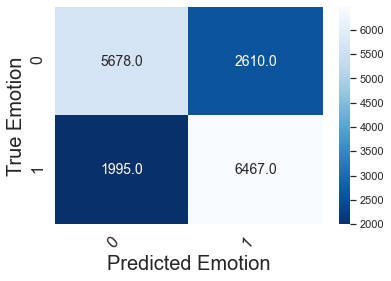

classification_report: 
               precision    recall  f1-score   support

           0       0.69      0.74      0.71      7673
           1       0.76      0.71      0.74      9077

    accuracy                           0.73     16750
   macro avg       0.72      0.73      0.72     16750
weighted avg       0.73      0.73      0.73     16750

KNNresult:

Precision_score: 0.7124600638977636
Recall_score: 0.764240132356417
f1_score: 0.737442271509208
AUC: 0.7784815622464818


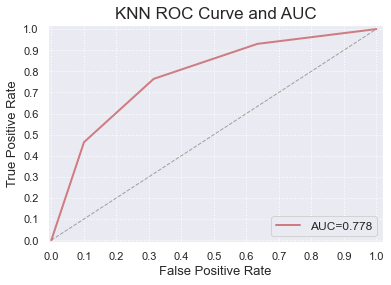

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict     0     1
true               
0        6334  1954
1        3819  4643


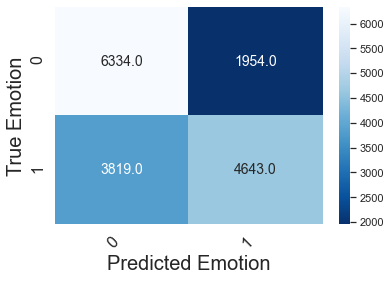

classification_report: 
               precision    recall  f1-score   support

           0       0.76      0.62      0.69     10153
           1       0.55      0.70      0.62      6597

    accuracy                           0.66     16750
   macro avg       0.66      0.66      0.65     16750
weighted avg       0.68      0.66      0.66     16750

Logisticresult:

Precision_score: 0.7038047597392755
Recall_score: 0.5486882533679981
f1_score: 0.6166412112358058
AUC: 0.6915148043741313


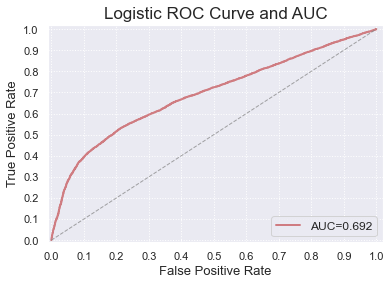

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict     0     1
true               
0        6726  1562
1        3378  5084


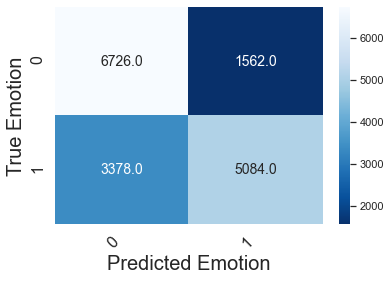

classification_report: 
               precision    recall  f1-score   support

           0       0.81      0.67      0.73     10104
           1       0.60      0.76      0.67      6646

    accuracy                           0.71     16750
   macro avg       0.71      0.72      0.70     16750
weighted avg       0.73      0.71      0.71     16750

Decision Treeresult:

Precision_score: 0.7649714113752634
Recall_score: 0.6008035925313164
f1_score: 0.6730209160709558
AUC: 0.7704207413976085


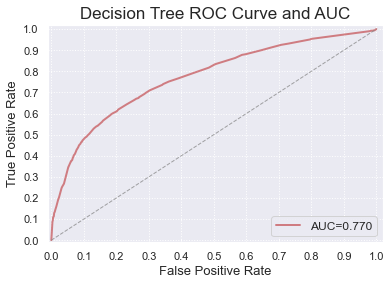

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict     0     1
true               
0        6964  1324
1        3553  4909


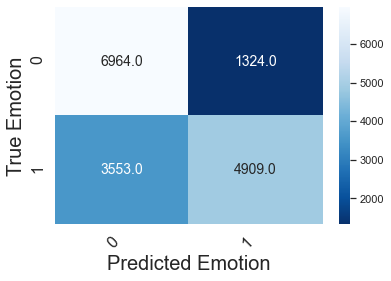

classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.66      0.74     10517
           1       0.58      0.79      0.67      6233

    accuracy                           0.71     16750
   macro avg       0.71      0.72      0.70     16750
weighted avg       0.74      0.71      0.71     16750

GBDTresult:

Precision_score: 0.7875822236483234
Recall_score: 0.5801229023871425
f1_score: 0.6681184076216399
AUC: 0.7856322915687576


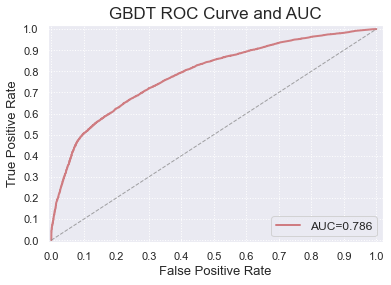

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict     0     1
true               
0        6967  1321
1        3277  5185


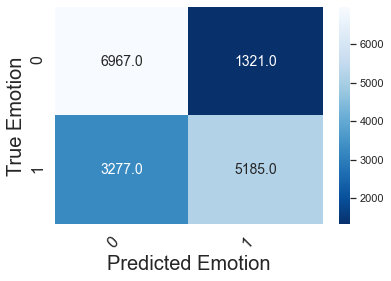

classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.68      0.75     10244
           1       0.61      0.80      0.69      6506

    accuracy                           0.73     16750
   macro avg       0.73      0.74      0.72     16750
weighted avg       0.75      0.73      0.73     16750

Random Forestresult:

Precision_score: 0.79695665539502
Recall_score: 0.6127393051288111
f1_score: 0.6928113308391234
AUC: 0.8044846070874196


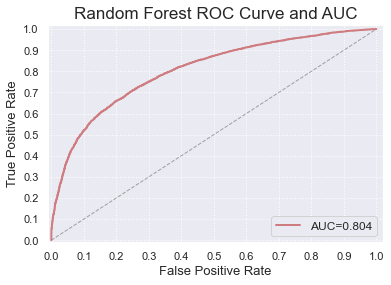

****************************************************************************************************
****************************************************************************************************
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
confusion matrix: 
 predict     0     1
true               
0        6643  1645
1        2364  6098


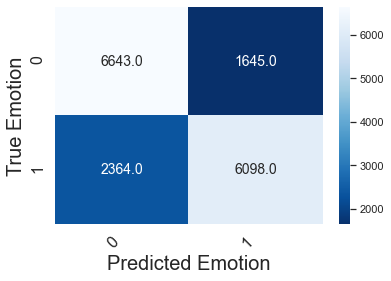

classification_report: 
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      9007
           1       0.72      0.79      0.75      7743

    accuracy                           0.76     16750
   macro avg       0.76      0.76      0.76     16750
weighted avg       0.76      0.76      0.76     16750

LightGBMresult:

Precision_score: 0.787550045202118
Recall_score: 0.720633419995273
f1_score: 0.752607219993829
AUC: 0.844480347469815


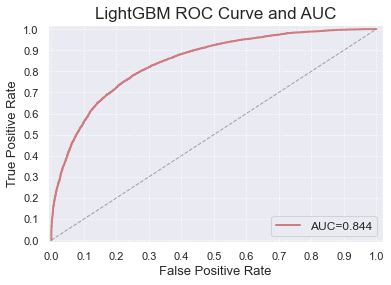

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict     0     1
true               
0        6846  1442
1        3365  5097


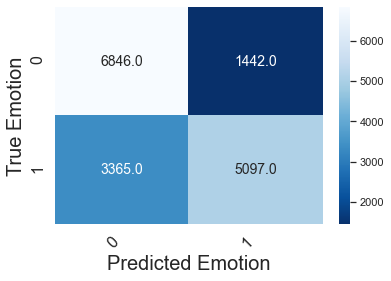

classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.67      0.74     10211
           1       0.60      0.78      0.68      6539

    accuracy                           0.71     16750
   macro avg       0.71      0.72      0.71     16750
weighted avg       0.74      0.71      0.72     16750

CatBoostresult:

Precision_score: 0.779476984248356
Recall_score: 0.6023398723705979
f1_score: 0.6795546963535765
AUC: 0.7890523478685998


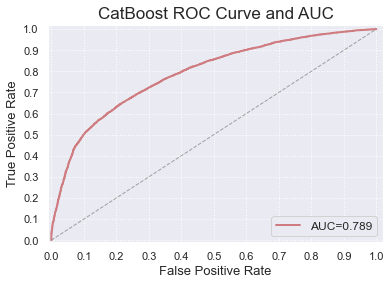

****************************************************************************************************
****************************************************************************************************
[22:37:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix: 
 predict     0     1
true               
0        6692  1596
1        2250  6212


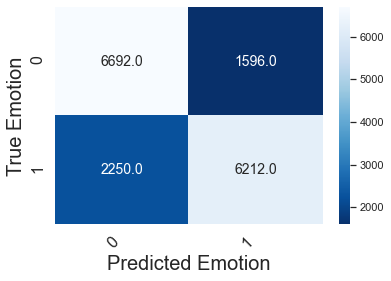

classification_report: 
               precision    recall  f1-score   support

           0       0.81      0.75      0.78      8942
           1       0.73      0.80      0.76      7808

    accuracy                           0.77     16750
   macro avg       0.77      0.77      0.77     16750
weighted avg       0.77      0.77      0.77     16750

xgBoostresult:

Precision_score: 0.795594262295082
Recall_score: 0.7341054124320492
f1_score: 0.7636140135218193
AUC: 0.8521872980980609


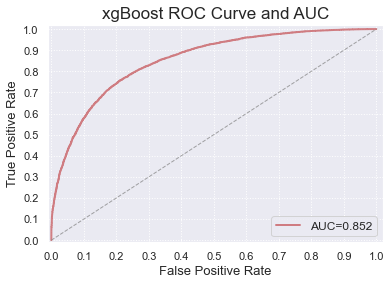

****************************************************************************************************
****************************************************************************************************
confusion matrix: 
 predict     0     1
true               
0        6791  1497
1        3320  5142


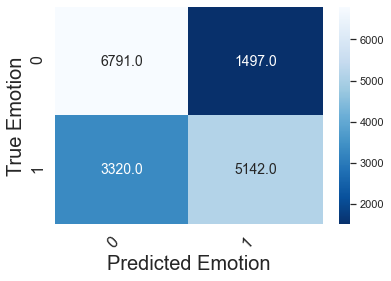

classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.67      0.74     10111
           1       0.61      0.77      0.68      6639

    accuracy                           0.71     16750
   macro avg       0.71      0.72      0.71     16750
weighted avg       0.74      0.71      0.72     16750

AdaBoostresult:

Precision_score: 0.7745142340713963
Recall_score: 0.6076577641219569
f1_score: 0.6810145023508376
AUC: 0.7849743279403083


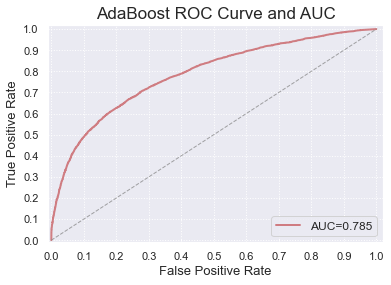

****************************************************************************************************


In [23]:
model = [knn,logr,dt, gbdt, rf,lg,ct,xg,ada]
model2 = ['KNN','Logistic','Decision Tree','GBDT','Random Forest','LightGBM','CatBoost','xgBoost','AdaBoost']
x1 = []
x2 = []
x3 = []
x4 = []
for i,md in enumerate(model):
    print('*'*100)
    md.fit(X_train, y_train)
    y_one_hot = y_test
    y_score = md.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_one_hot,y_score[:,1])
    auc1 = auc(fpr, tpr)
    Y_valid = y_test
    Y_pred = md.predict(X_test)
    precision = precision_score(Y_valid, Y_pred)
    recall = recall_score(Y_valid, Y_pred)
    f1 = f1_score(Y_valid, Y_pred)
    
    predd = pd.DataFrame()
    predd['predict'] = Y_pred
    predd['true'] = list(Y_valid)
    predd['x'] = 0
    gg = predd.groupby(['predict','true'])['x'].count().unstack(0)
    print('confusion matrix: \n', gg)
    f, ax = plt.subplots(figsize=(6,4))
    df_cm = pd.DataFrame(gg)
    sns.heatmap(df_cm,annot=True,fmt ='.1f',cmap = 'Blues_r',annot_kws={'size': 14})
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, rotation=45, horizontalalignment='right',fontsize=16)
    plt.setp(label_y,  fontsize=16)
    plt.xlabel('Predicted Emotion',fontsize=20)
    plt.ylabel('True Emotion',fontsize=20)
    plt.show()
    
    print('classification_report: \n', classification_report(Y_pred, Y_valid,))
    print(model2[i]+'result:\n')
    print("Precision_score:",precision)
    print("Recall_score:",recall)
    print("f1_score:",f1)
    print("AUC:",auc1)
    x1.append(precision)
    x2.append(recall)
    x3.append(auc1)
    x4.append(f1)
    plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'AUC=%.3f' % auc1)
    plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
    plt.xlim((-0.01, 1.02))
    plt.ylim((-0.01, 1.02))
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.grid(b=True, ls=':')
    plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
    plt.title(model2[i]+' ROC Curve and AUC', fontsize=17)
    plt.savefig(model2[i]+'ROCcurve.png')
    plt.show()
    print('*'*100)
res = pd.DataFrame()
res['classifer'] = model2
res['precision'] = x1
res['recall'] = x2
res['f1_score'] = x4
res['AUC'] = x3

In [24]:
res.to_csv('result1.csv',index=False,encoding='utf-8-sig')

In [25]:
res.style.background_gradient('autumn_r')

,classifer,precision,recall,f1_score,AUC
0,KNN,0.712460,0.764240,0.737442,0.778482
1,Logistic,0.703805,0.548688,0.616641,0.691515
2,Decision Tree,0.764971,0.600804,0.673021,0.770421
3,GBDT,0.787582,0.580123,0.668118,0.785632
4,Random Forest,0.796957,0.612739,0.692811,0.804485
5,LightGBM,0.787550,0.720633,0.752607,0.844480
6,CatBoost,0.779477,0.602340,0.679555,0.789052
7,xgBoost,0.795594,0.734105,0.763614,0.852187
8,AdaBoost,0.774514,0.607658,0.681015,0.784974


In [26]:
X_test.shape

(16750, 12)

In [27]:
X_train.shape

(39082, 12)

In [28]:
2037/(5994+2037)

0.2536421367202092

## Parametric Optimization

[20:34:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
looking for the best max_depth=2, now auc =0.8441100004189583
[20:34:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
looking for the best max_depth=3, now auc =0.8584732761119303
[20:34:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: S

looking for the best max_depth=21, now auc =0.9227820207428659
[20:40:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
looking for the best max_depth=22, now auc =0.9215664562867116
[20:41:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
looking for the best max_depth=23, now auc =0.9203997211997306
[20:42:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c091

No handles with labels found to put in legend.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


looking for the best max_depth=29, now auc =0.9233778623034381
the best auc is：0.9233778623034381, now max_depth=29


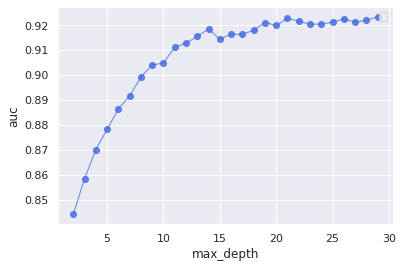

In [26]:
import numpy as np
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
aucs = []
n_estimators = []
for n in range(2, 30, 1):
    rfc = xgb.XGBClassifier(max_depth=n)
    rfc.fit(X_train, y_train)
    preprorfc = rfc.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, preprorfc)
    n_estimators.append(n)
    aucs.append(auc(fpr, tpr))
    print('looking for the best max_depth={}, now auc ={}'.format(n, auc(fpr, tpr)))
print('the best auc is：{}, now max_depth={}'.format(max(np.array(aucs)), n_estimators[np.argmax(aucs)]))
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']  
x_axis_data = n_estimators
y_axis_data = aucs
plt.plot(x_axis_data, y_axis_data, 'ro-', color='#4169E1', alpha=0.8, linewidth=1)
plt.legend(loc="upper right")
plt.xlabel('max_depth')
plt.ylabel('auc')
plt.show()

## pca

[20:47:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
looking for the best n_component=5, now auc =0.7212
[20:47:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
looking for the best n_component=6, now auc =0.7289
[20:47:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1

No handles with labels found to put in legend.


looking for the best n_component=11, now auc =0.8005
the best auc：0.8005241282057991, now n_estimators=11


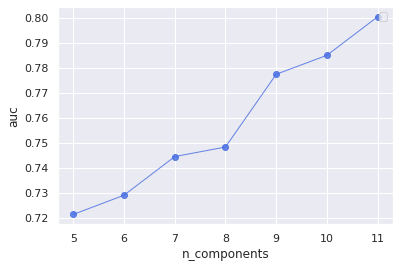

In [27]:
from sklearn.decomposition import PCA
aucs = []
n_components = []
for n_component in range(5, 12):
    pca = PCA(n_components = n_component)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    rfc = xgb.XGBClassifier()
    rfc.fit(X_train_pca, y_train.tolist())
    preprorfc = rfc.predict_proba(X_test_pca)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, preprorfc)
    n_components.append(n_component)
    aucs.append(auc(fpr, tpr))
    print('looking for the best n_component={}, now auc ={}'.format(n_component, round(auc(fpr, tpr), 4)))
print('the best auc：{}, now n_estimators={}'.format(max(np.array(aucs)), n_components[np.argmax(aucs)]))
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']  
x_axis_data = n_components
y_axis_data = aucs
plt.plot(x_axis_data, y_axis_data, 'ro-', color='#4169E1', alpha=0.8, linewidth=1)
plt.legend(loc="upper right")
plt.xlabel('n_components')
plt.ylabel('auc')
plt.show()

##  k-ford

In [28]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
from sklearn import preprocessing
X_train_sc = preprocessing.scale(X_train)
info = {}
for i in y_train:
    info[i] = info.setdefault(i, 0) + 1
print(info)

{0: 195385, 1: 19568}


In [29]:
ks = []
aucs = []
for index, (train_index, test_index) in enumerate(kf.split(X_train_sc)):
    train_X_k, train_y_k = np.array(X_train_sc)[train_index], np.array(y_train)[train_index]
    test_X_k, test_y_k = np.array(X_train_sc)[test_index], np.array(y_train)[test_index]
    rfc = xgb.XGBClassifier()
    rfc.fit(train_X_k, train_y_k)
    preprorfc = rfc.predict_proba(test_X_k)[:,1]
    fpr, tpr, thresholds = roc_curve(test_y_k, preprorfc)
    print('the{}，auc:{}'.format(index, auc(fpr, tpr)))
    ks.append(index)
    aucs.append(auc(fpr, tpr))

[20:49:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
the0，auc:0.8827325244983273
[20:49:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
the1，auc:0.8783838115908752
[20:49:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with th

No handles with labels found to put in legend.


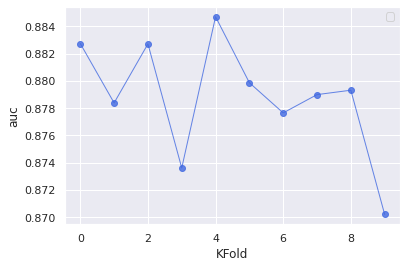

In [30]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
x_axis_data = ks
y_axis_data = aucs
plt.plot(x_axis_data, y_axis_data, 'ro-', color='#4169E1', alpha=0.8, linewidth=1)
plt.legend(loc="upper right")
plt.xlabel('KFold')
plt.ylabel('auc')
plt.show()